<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_07_Airlines(Hierarchical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [22]:
airline=pd.read_csv('EastWestAirlines.csv')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [23]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
# Normalized data frame 
df_norm = norm_func(airline.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


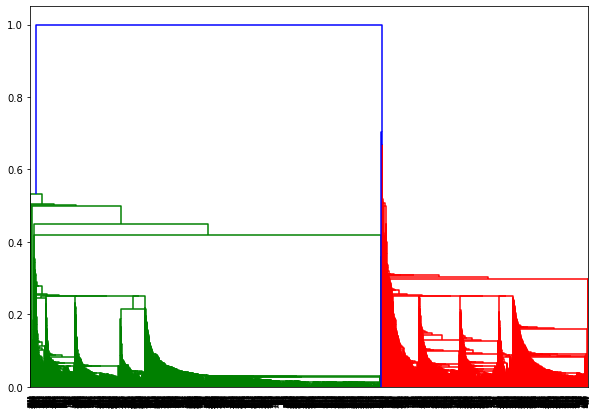

In [25]:
# create 
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

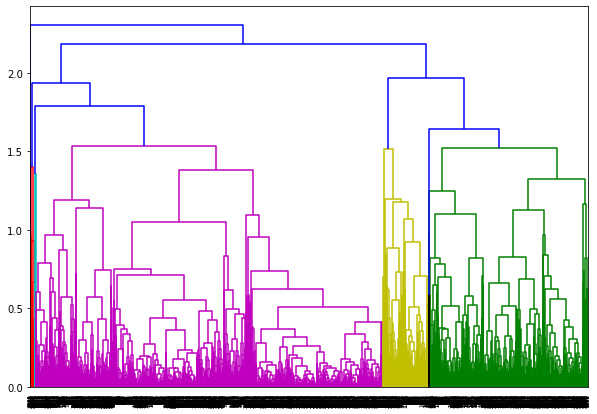

In [26]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

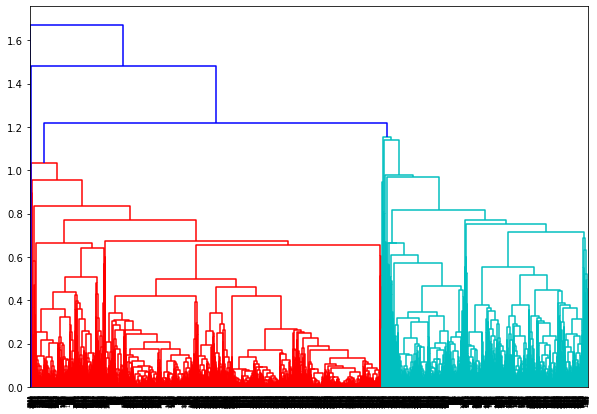

In [27]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [43]:
# create clusters(we will take the compelte linkage cluster)
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [44]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [45]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [46]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,1
...,...
3994,0
3995,0
3996,0
3997,2


In [47]:
airline['h_clusterid'] = Clusters
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2
